<a href="https://colab.research.google.com/github/ChahineBA/House-Prices---Advanced-Regression-Techniques/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [28]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
%matplotlib inline
# machine learning models
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, zero_one_loss
from sklearn.decomposition import PCA

# Read Data

In [29]:
#import the dataset
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
sample = pd.read_csv('/content/sample_submission.csv')

In [97]:
df_test_2 = pd.read_csv('/content/test.csv')

In [30]:
#Read Description:
file_path = '/content/data_description.txt'
with open(file_path,'r') as file:
  file_content = file.read()
  print(file_content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [31]:
#training Data:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [33]:
#Dataset Shape:
print(f"The Training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns in the dataset.")
print(f"The testing dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns in the dataset.")

The Training dataset has 1460 rows and 81 columns in the dataset.
The testing dataset has 1459 rows and 80 columns in the dataset.


In [34]:
#Dataset info:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Manipulation


## Training Dataset:

<Axes: >

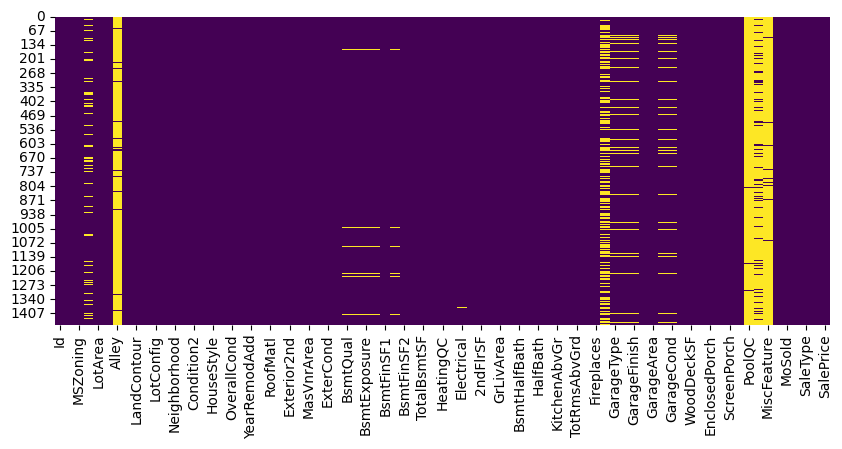

In [35]:
# heatmap to visualize the missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

In [36]:
missing_data = df_train.isnull().sum() / len(df_train) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [37]:
data = []
for col in df_train.columns:
    data.append([col, df_train[col].dtype,
                 df_train[col].nunique(),
                 df_train[col].isnull().sum(),
                 df_train[col].isnull().sum() / len(df_train) * 100])

data = pd.DataFrame(data, columns=['Column', 'dtype', 'Nunique', 'Missing_Values', 'Percentage'])
data = data.sort_values(by='Percentage', ascending=False)
data = data[data.Percentage > 0]
data

,Column,dtype,Nunique,Missing_Values,Percentage
72,PoolQC,object,3,1453,99.520548
74,MiscFeature,object,4,1406,96.301370
6,Alley,object,2,1369,93.767123
73,Fence,object,4,1179,80.753425
57,FireplaceQu,object,5,690,47.260274
3,LotFrontage,float64,110,259,17.739726
59,GarageYrBlt,float64,97,81,5.547945
64,GarageCond,object,5,81,5.547945
58,GarageType,object,6,81,5.547945
60,GarageFinish,object,3,81,5.547945


In [38]:
#Dealing With Missing Values:
data = df_train.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
column_missing = list(data[data['Missing_Values'] > 0]['Column'])
print(column_missing)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [39]:
# imputing the missing values
for col in column_missing:
    if col == 'Electrical':
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    elif df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna('None')
    else:
        df_train[col] = df_train[col].fillna(0)

In [40]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Test Dataset:

In [91]:
test_missing_data = df_test.isnull().sum() / len(df_test) * 100
test_missing_data = test_missing_data[test_missing_data > 0].sort_values(ascending=False)
print(test_missing_data)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


In [92]:
# Let's impute the missing values in the test dataset, object type with 'None', int type with 0, and the electrical column with the mode value.
test_data = df_test.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
test_column_missing = list(test_data[test_data['Missing_Values'] > 0]['Column'])

# imputing the missing values
for col in test_column_missing:
    if col == 'Electrical':
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    elif df_test[col].dtype == 'object':
        df_test[col] = df_test[col].fillna('None')
    else:
        df_test[col] = df_test[col].fillna(0)

In [93]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# Data Plotting & Insights



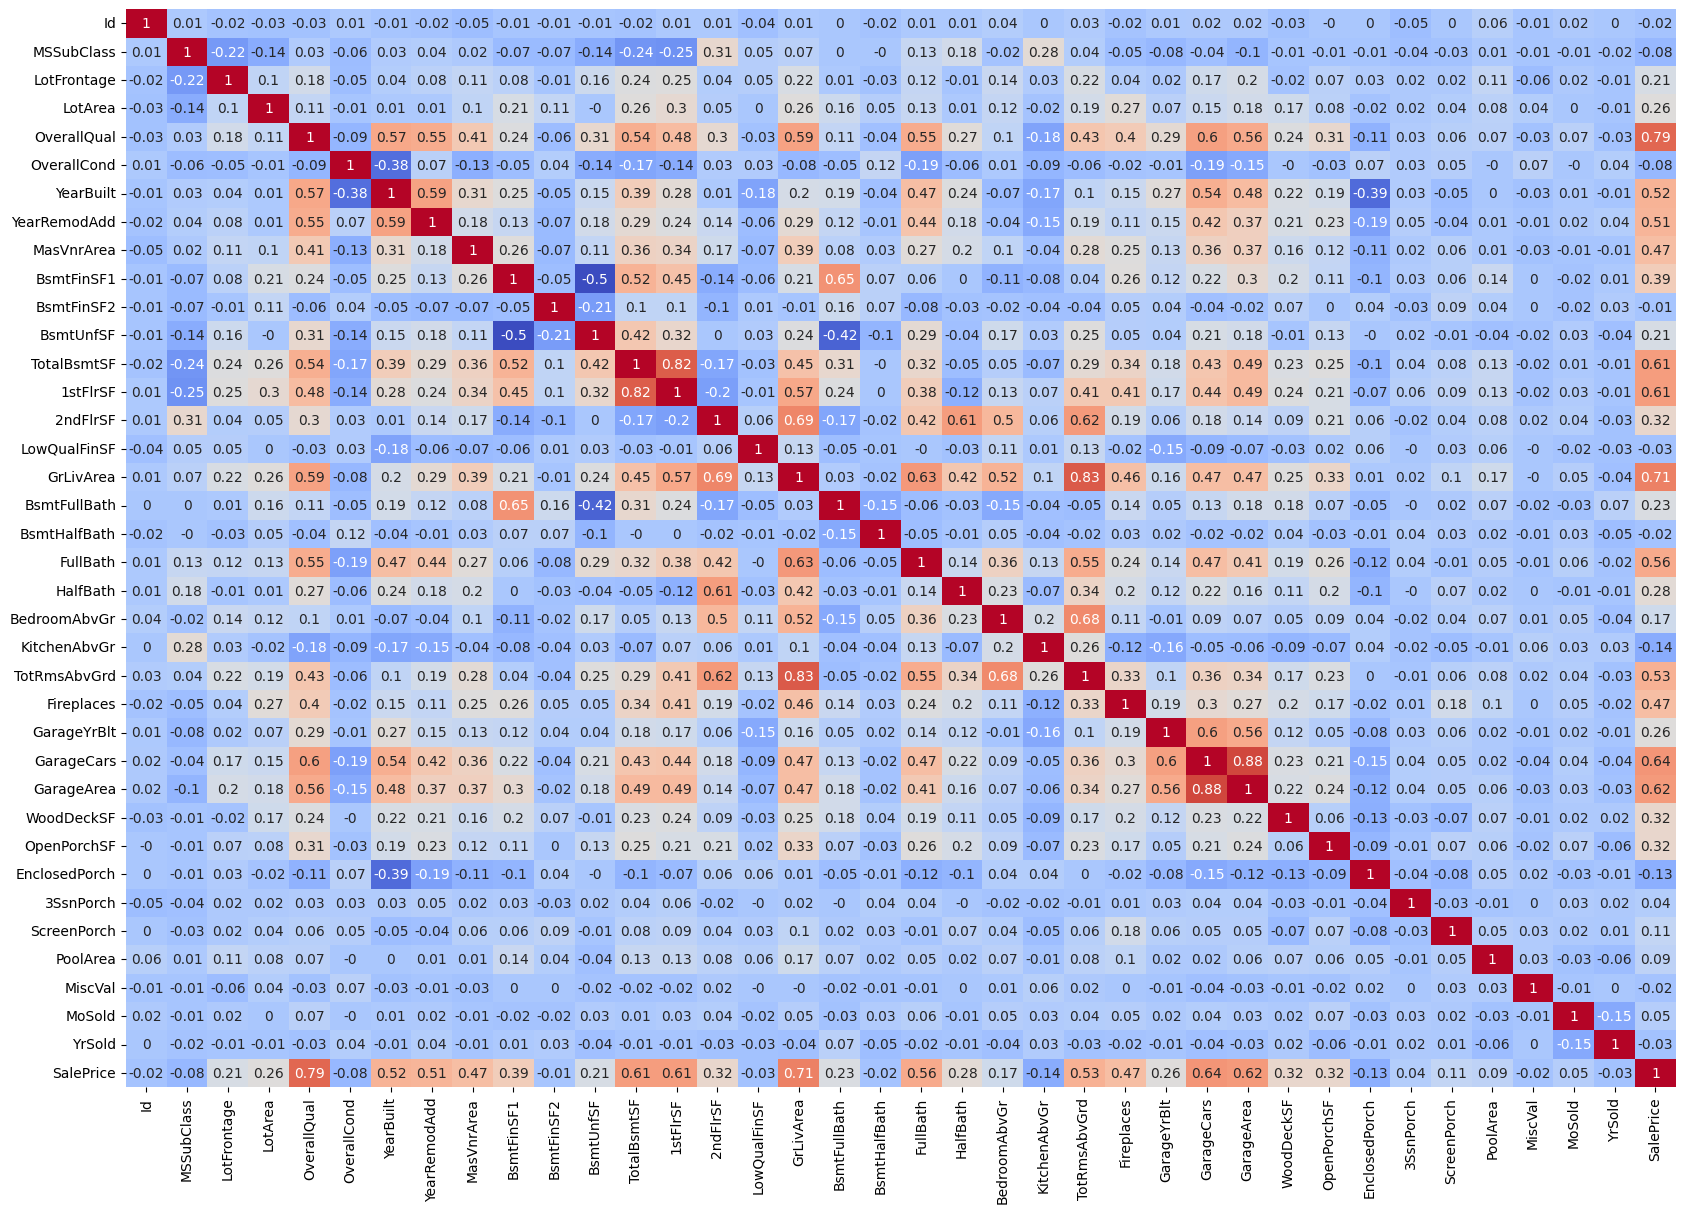

<Figure size 1200x800 with 0 Axes>

In [41]:
# checking the correlation of the dataset to see if multicollinearity exists
plt.figure(figsize=(20, 14))
# Numerical Columns
num_col = df_train.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_col.corr().round(2), annot=True, cmap='coolwarm', cbar=False)
plt.figure(figsize=(12, 8))
plt.show()

* "OverallQual" (Overall Quality) has a strong positive correlation (approx. 0.79) with "SalePrice," indicating higher quality associates with higher sale prices.

Garage-related Features:

* "GarageCars" and "GarageArea" have a high positive correlation (approx. 0.88), suggesting a larger garage is associated with more car capacity. "GarageYrBlt" (Year garage was built) positively correlates (0.52) with "SalePrice."

Living Area and Rooms:

* "GrLivArea" (Above ground living area) strongly correlates (0.71) with "SalePrice," suggesting larger living areas lead to higher sale prices. "TotRmsAbvGrd" (Total rooms above ground) positively correlates(0.53) with "SalePrice."

Basement Features:

* "TotalBsmtSF" (Total square feet of basement area) and "1stFlrSF" (First Floor square feet) highly positively correlate (0.82).

Year of Construction and Remodeling:

* "YearBuilt" (Year house was built) positively correlates (0.52) with "SalePrice." "YearRemodAdd" (Year of remodeling or addition) positively correlates (0.51) with "SalePrice."

Exterior Masonry Veneer Area:

* "MasVnrArea" (Masonry Veneer Area) has a positive correlation (0.47) with "SalePrice."

Full Bath Features:

* "FullBath" has a positve good correlation (0.56) with "SalePrice."

Miscellaneous Features:

* "MiscVal"has low correlations with "SalePrice," suggesting these features may not strongly affect sale price.

Text(0.5, 0.98, 'Correlation between numerical features and Sales Price')

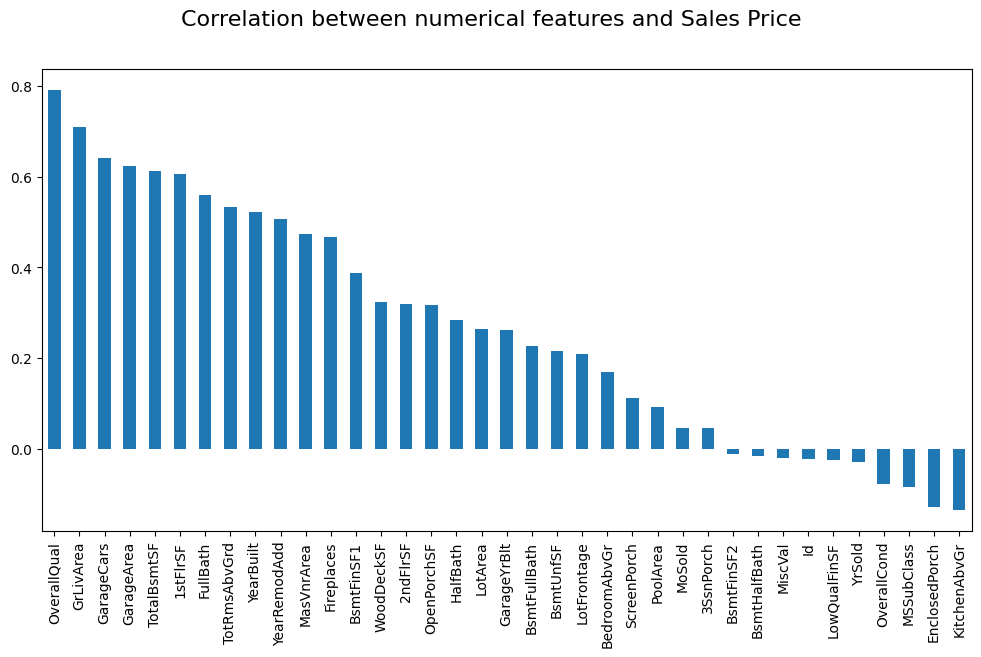

In [42]:
#Show Numerical features correlation with sales price
plt.figure(figsize=(12, 6))
df_train.select_dtypes(include=[np.number]).corr()['SalePrice'].sort_values(ascending = False).drop('SalePrice').plot(kind = 'bar')
plt.suptitle('Correlation between numerical features and Sales Price', fontsize=16)

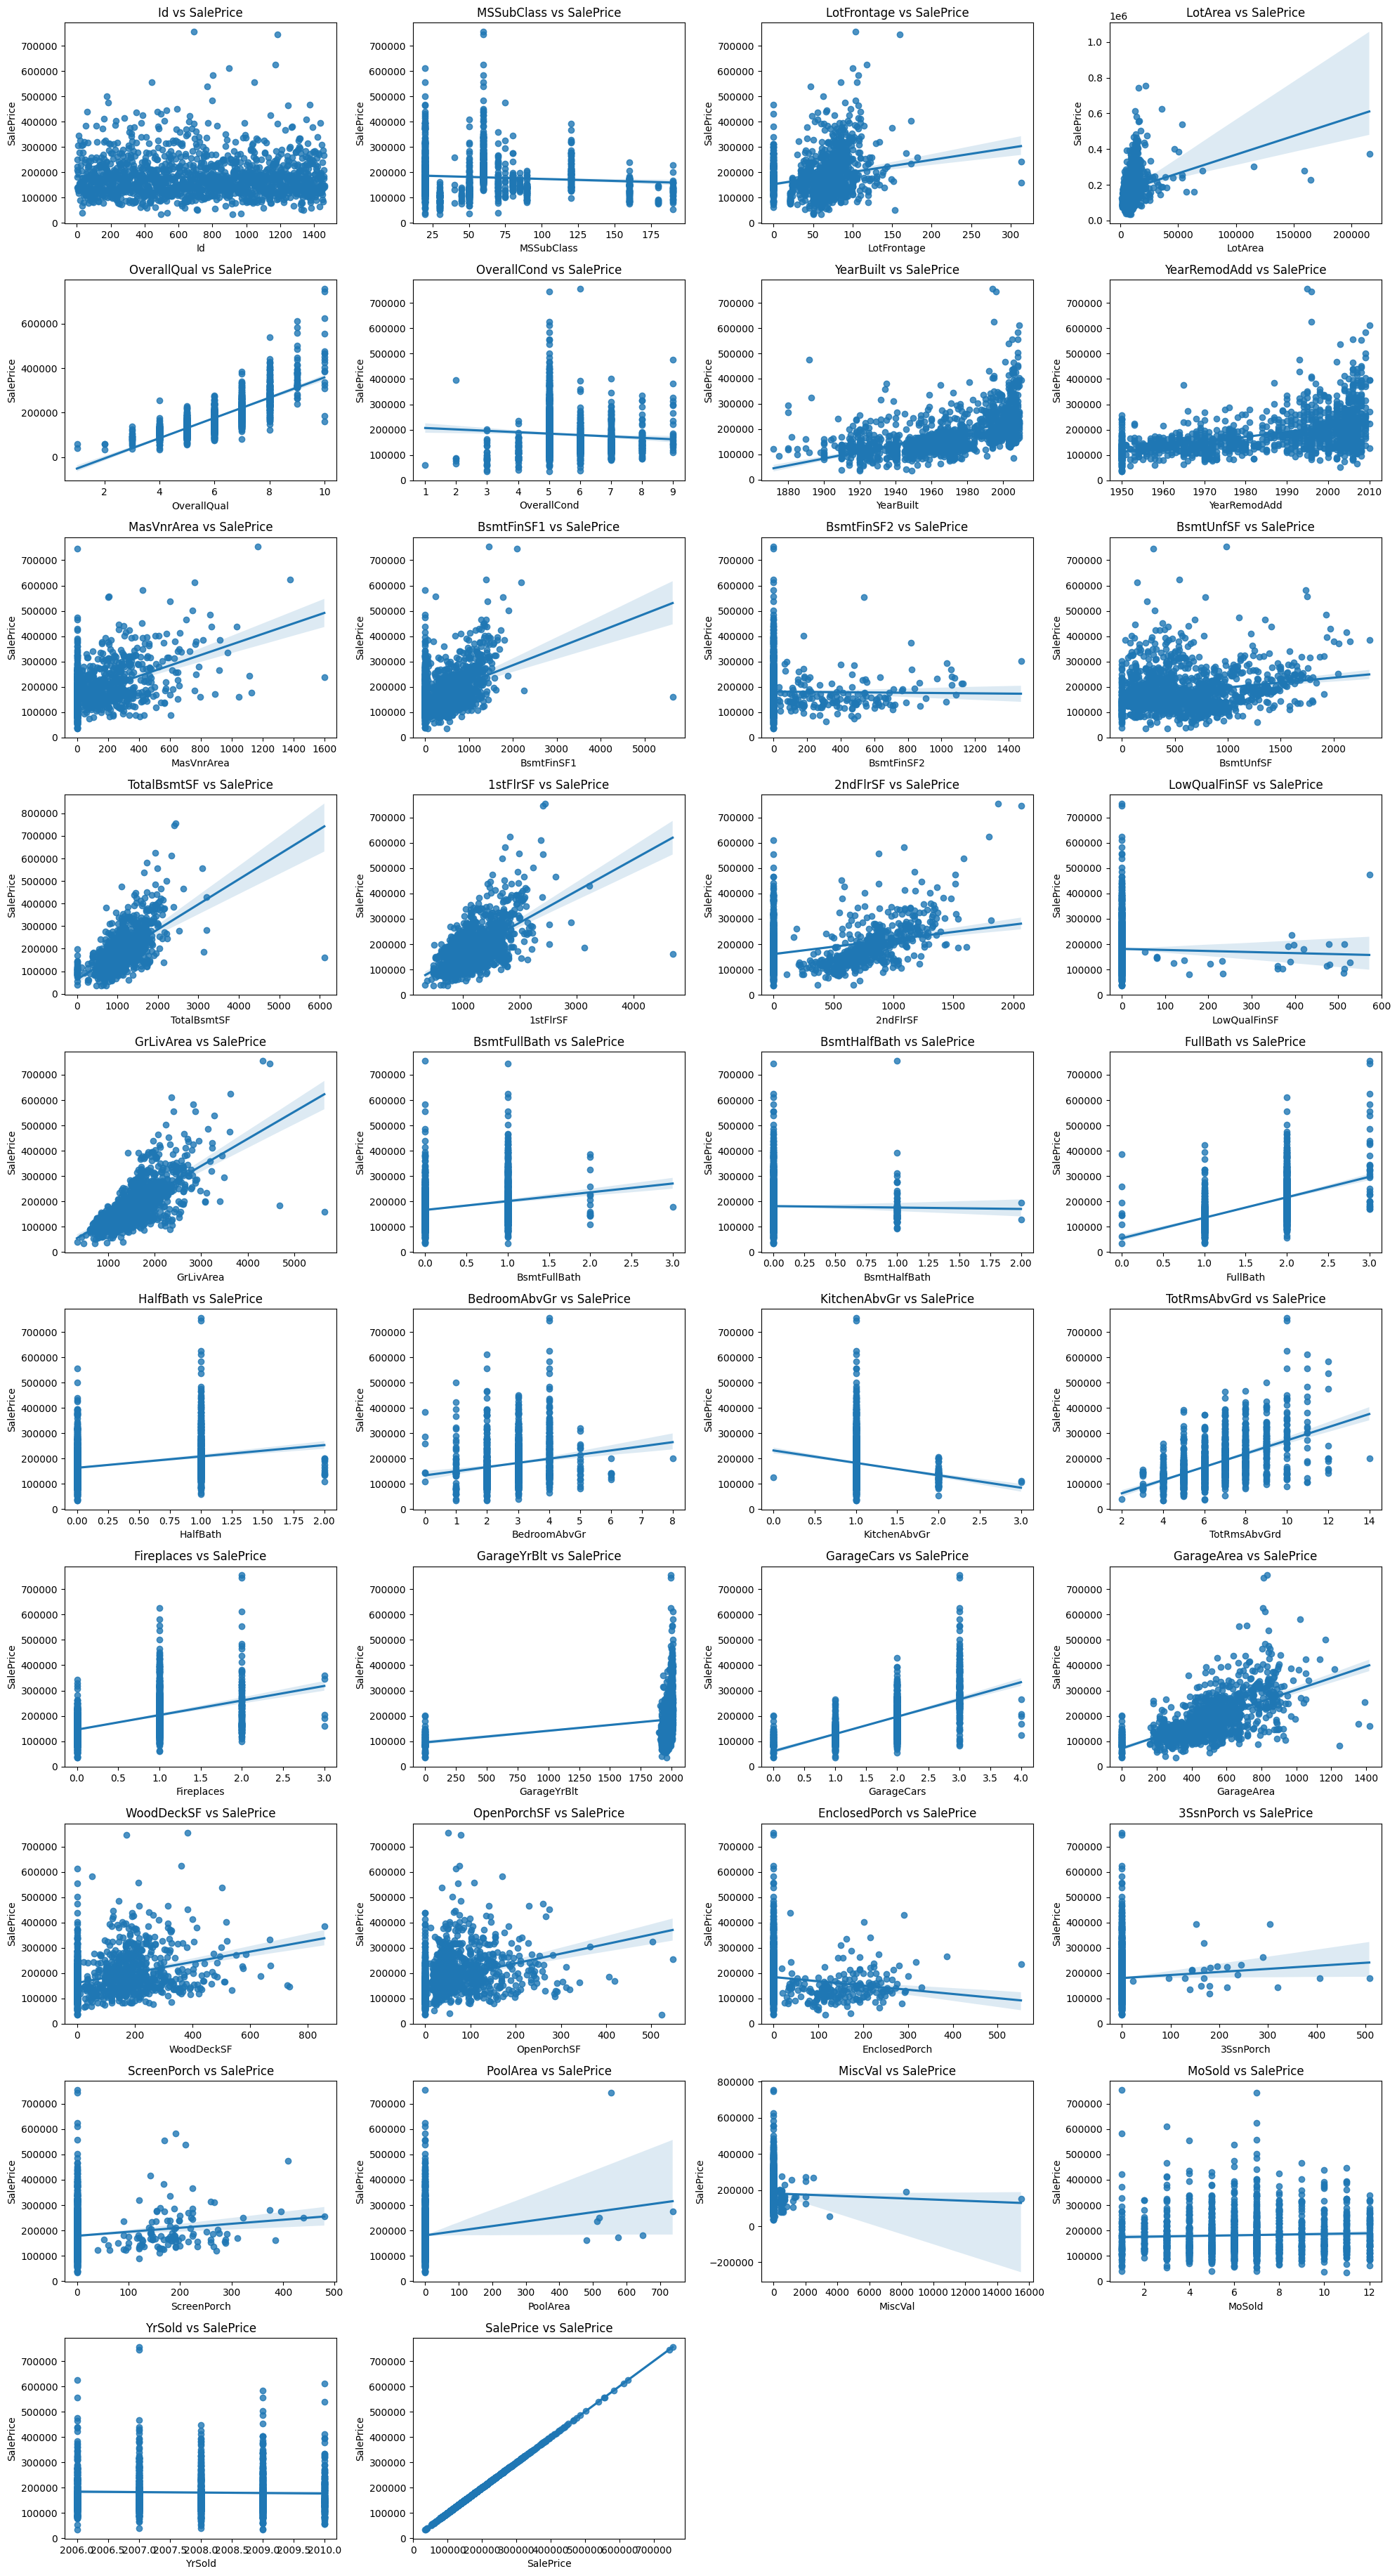

<ipython-input-45-14e475cb8ac4>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=stats.norm)


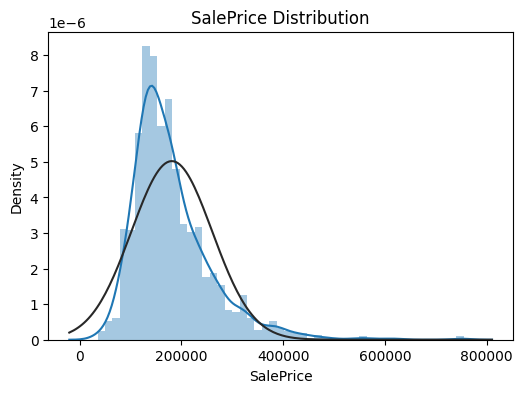

The skewness of the target variable is 1.8828757597682129
The kurtosis of the target variable is 6.536281860064529


In [45]:
# distribution of the num_cols with the target variable

plt.figure(figsize=(20, 40))
for i, col in enumerate(num_col.columns):
    plt.subplot(11, 4, i+1)
    sns.regplot(data=df_train, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

# checking the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.distplot(df_train['SalePrice'], fit=stats.norm)
plt.title('SalePrice Distribution')
plt.show()

# checking the skewness and kurtosis of the target variable
print(f"The skewness of the target variable is {df_train['SalePrice'].skew()}")
print(f"The kurtosis of the target variable is {df_train['SalePrice'].kurt()}")
# The target variable is right skewed and has a high kurtosis value.

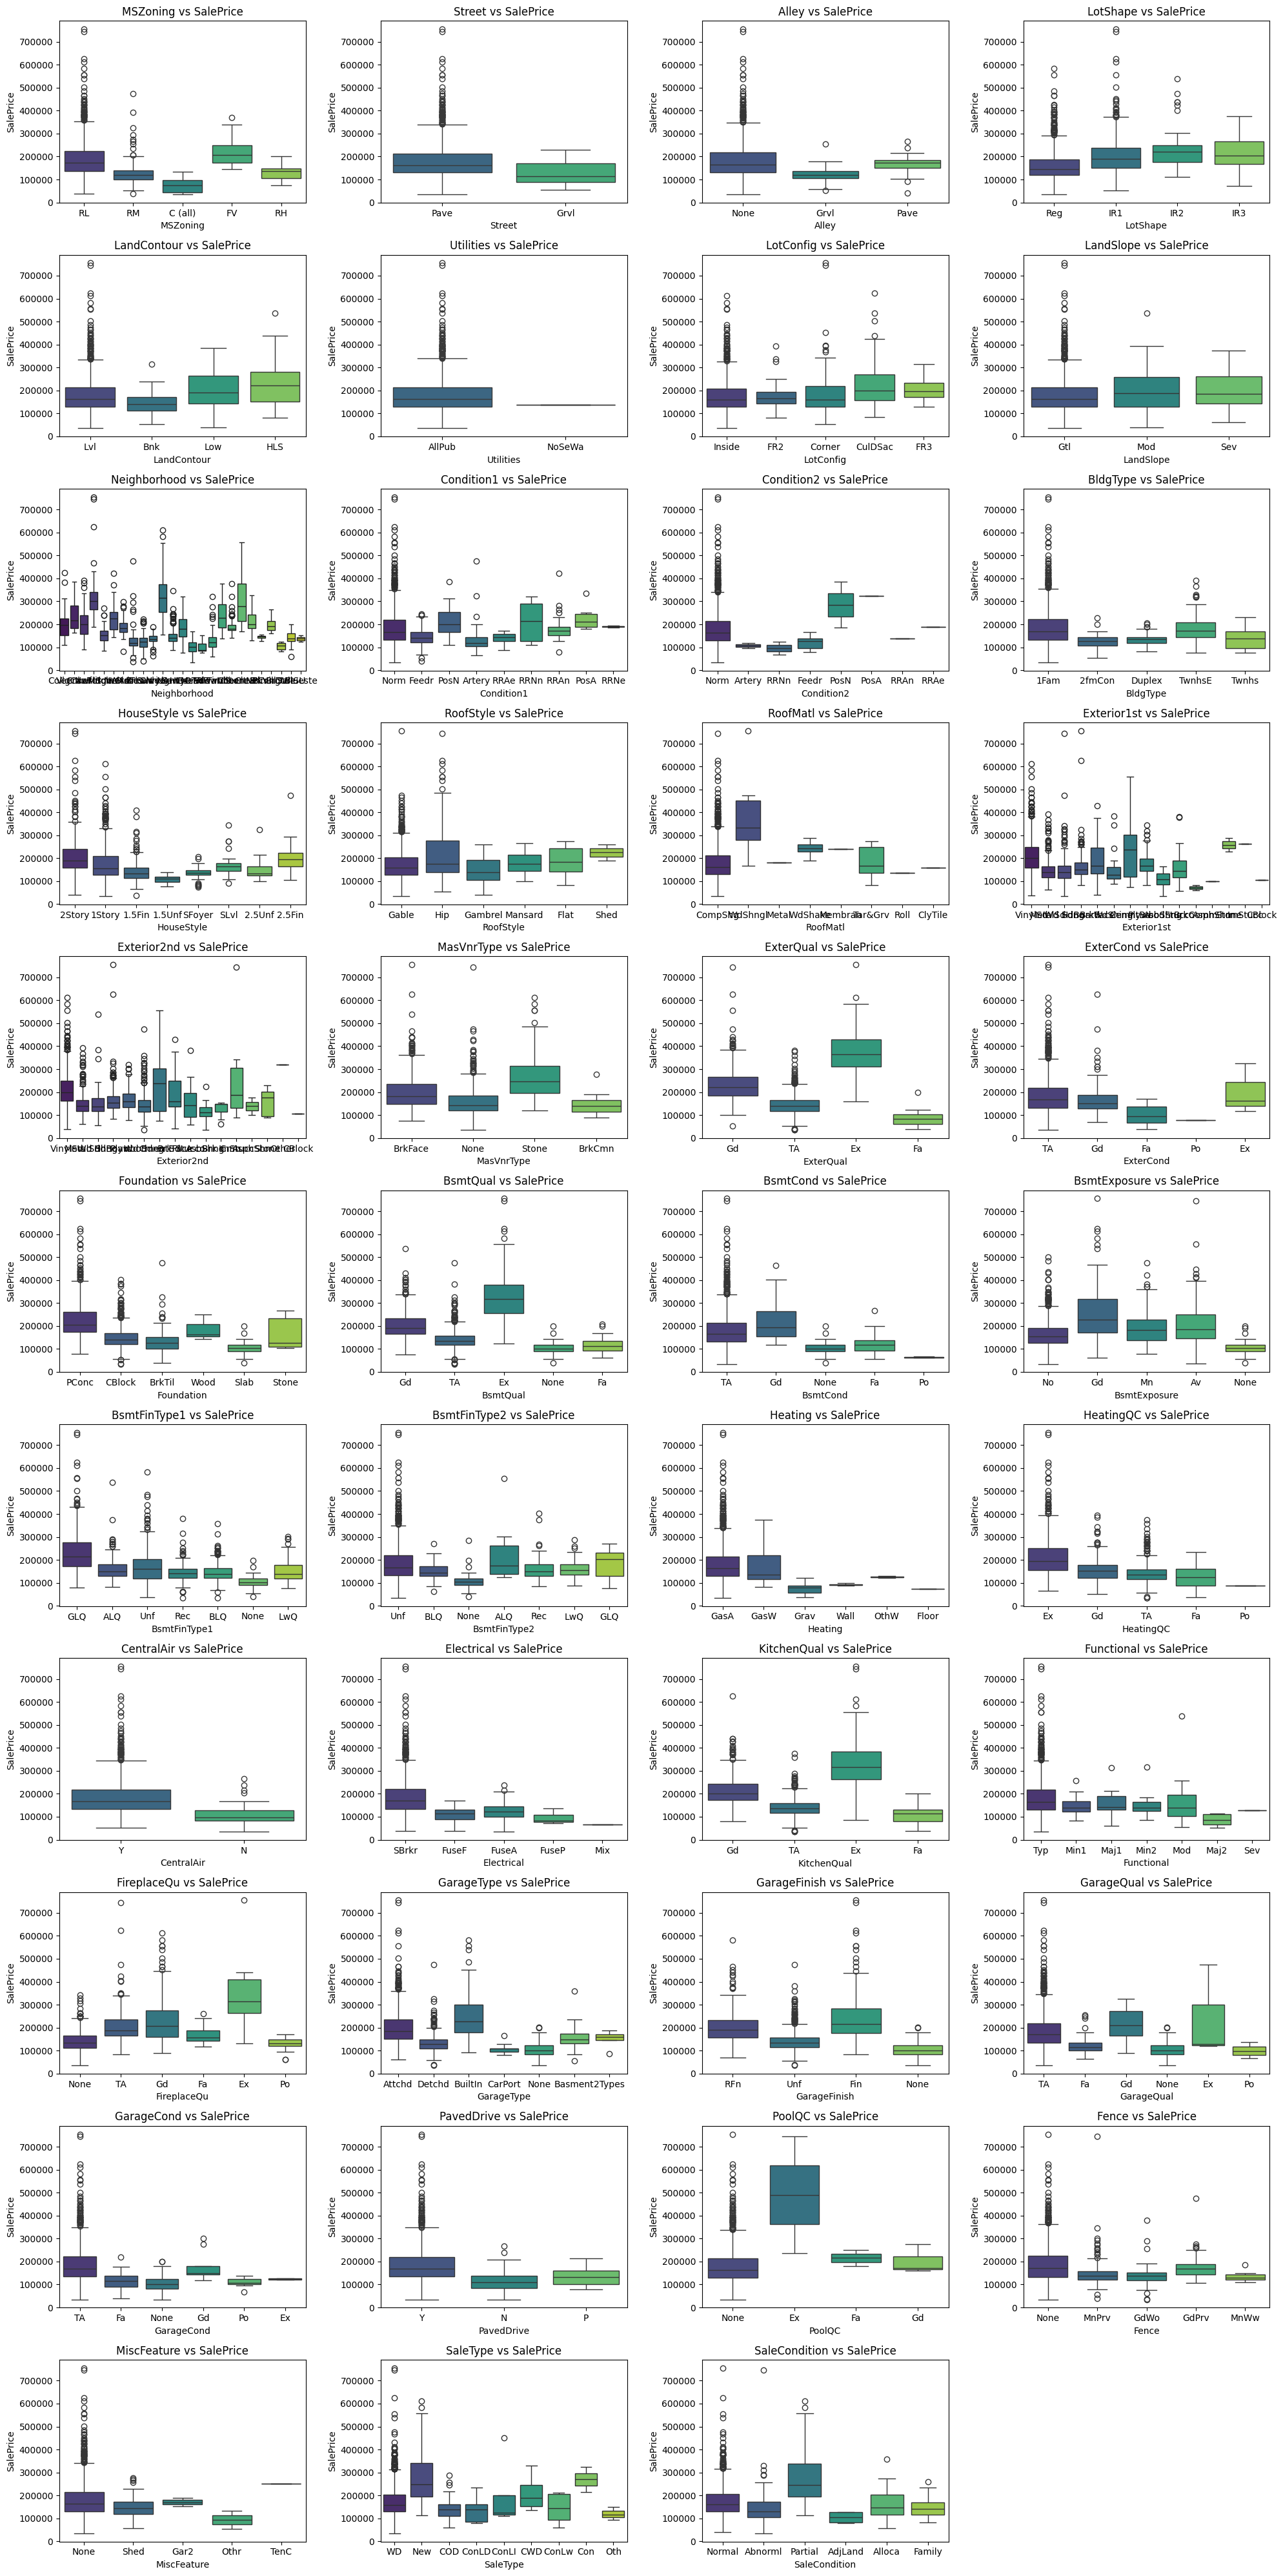

In [48]:
# Let's check the object columns distribution with the target variable through boxplot
cat_col = df_train.select_dtypes(include=['object'])
plt.figure(figsize=(20, 40))
for i, col in enumerate(cat_col.columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(data=df_train, x=col, y='SalePrice', palette='viridis',hue=col,legend=False)
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

==> After checking the numerical columns and categorical columns distribution, we found that trends are different for each column. It is because of the reality in housing data that with the increase or decrease of the variables the price of the house changes. So, we will use different models to predict the house prices. We will use **Random Forest, XGBoost, CatBoost, and Gradient Boosting** to predict the house prices. We will use the best model to predict the house prices.

# Modelling

## Data Preprocessing:

In [49]:
#Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder

# encoding the object columns
Object_columns = df_train.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()

object_cols = df_train.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in object_cols:
    df_train[column] = encoder.fit_transform(df_train[column].values.reshape(-1, 1))

# checking the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000


In [94]:
from sklearn.preprocessing import OrdinalEncoder

test_object_cols = df_test.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in test_object_cols:
    df_test[column] = encoder.fit_transform(df_test[column].values.reshape(-1, 1))

# checking the dataset
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.0,80.0,11622,1.0,1.0,3.0,3.0,0.0,...,120,0,2.0,2.0,1.0,0,6,2010,9.0,4.0
1,1462,20,4.0,81.0,14267,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,0.0,12500,6,2010,9.0,4.0
2,1463,60,4.0,74.0,13830,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,2.0,1.0,0,3,2010,9.0,4.0
3,1464,60,4.0,78.0,9978,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,1.0,0,6,2010,9.0,4.0
4,1465,120,4.0,43.0,5005,1.0,1.0,0.0,1.0,0.0,...,144,0,2.0,4.0,1.0,0,1,2010,9.0,4.0


In [50]:
#Splitting The dataset:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# checking the shape of the dataset after splitting
print(f"X_train shape: ", X_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_train shape: ", y_train.shape)
print(f"y_test shape: ", y_test.shape)

X_train shape:  (1168, 80)
X_test shape:  (292, 80)
y_train shape:  (1168,)
y_test shape:  (292,)


In [52]:
# using the standard scaler to scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

In [54]:
#Importing the Models:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor

In [55]:
#Models:
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = xgb.XGBRegressor()
lr = LinearRegression()
lasso = Lasso()

In [56]:
#Random Forest Regressor:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"RandomForestRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"RandomForestRegressor: ", rf.score(X_test, y_test))

RandomForestRegressor:  29188.979268555773
RandomForestRegressor:  0.8889230408555695


In [57]:
#Gradient Boosting Regressor:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f"GradientBoostingRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"GradientBoostingRegressor: ", gb.score(X_test, y_test))

GradientBoostingRegressor:  28863.54211098161
GradientBoostingRegressor:  0.8913860974502249


In [58]:
#XG Boost Regressor:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"XGBRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"XGBRegressor: ", xgb.score(X_test, y_test))

XGBRegressor:  27075.604537667597
XGBRegressor:  0.9044253997446341


In [59]:
#Linear Regression:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"LinearRegression: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"LinearRegression: ", lr.score(X_test, y_test))

LinearRegression:  34231.55070679173
LinearRegression:  0.8472295659741729


In [60]:
#Lasso
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f"Lasso: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"Lasso: ", lasso.score(X_test, y_test))

Lasso:  34225.983241432186
Lasso:  0.8472792555099973


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


==> We drop the Linear regression and Lasso regression because their performance is not good. We will use **Random Forest, XGBoost, and Gradient Boosting to predict the house prices**. We will use the best model to predict the house prices.

## Random forest Regressor with GridSearchCV

In [61]:
# using the gridsearchcv to find the best parameters for the models
model = RandomForestRegressor()
rf_params = {'n_estimators': [20, 40, 60, 80],
              'max_features': [0.2, 0.6, 1.0],
              'max_depth': [2, 4, None],
              'min_samples_leaf': [1, 2, 4],
              'random_state': [42]}
grid_rf = GridSearchCV(estimator = rf,param_grid = rf_params, cv=5,verbose = 2,n_jobs = -1)

In [62]:
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'max_features': 0.6,
 'min_samples_leaf': 1,
 'n_estimators': 80,
 'random_state': 42}

In [63]:
# using the best parameters to train the model
rf_model = RandomForestRegressor(n_estimators=80, max_features=0.6, max_depth=None, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"RandomForestRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"RandomForestRegressor: ", rf_model.score(X_test, y_test))

RandomForestRegressor:  28543.48674426345
RandomForestRegressor:  0.8937814880993539


## Gradient Boosting Regressor with GridSearchCV

In [64]:
model = GradientBoostingRegressor()
param_gb = {'n_estimators': [10, 20, 30, 40, 50],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 5, 10]}
grid_gb = GridSearchCV(estimator = gb,
                         param_grid = param_gb,
                        cv=5,
                         verbose= 2,
                        n_jobs = -1)

In [65]:
grid_gb.fit(X_train, y_train)
grid_gb.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [66]:
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print(f"GradientBoostingRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"GradientBoostingRegressor: ", gb_model.score(X_test, y_test))

GradientBoostingRegressor:  25499.792411701445
GradientBoostingRegressor:  0.9152266285062831


## XGBoost Regressor with GridSearchCV

In [67]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

param_xgb = {'n_estimators': [20, 40, 60, 80, 100],
             'max_depth': [2, 4, 6],
             'learning_rate': [0.01, 0.1, 0.2],
             'gamma': [0.1, 0.2],
             'reg_alpha': [0.01, 0.1, 0.2],
             'subsample': [0.5, 0.6]}

grid_xgb = GridSearchCV(estimator=xgb,
                         param_grid=param_xgb,
                         cv=5,
                         verbose=2,
                        n_jobs=-1)

In [68]:
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 100,
 'reg_alpha': 0.01,
 'subsample': 0.6}

In [69]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, gamma=0.1, reg_alpha=0.01, subsample=0.6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(f"XGBRegressor: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"XGBRegressor: ", xgb_model.score(X_test, y_test))

XGBRegressor:  26471.154734081978
XGBRegressor:  0.9086450805313688


## Results

In [70]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb.fit(X_train, y_train)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb.predict(X_test)))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb.predict(X_test)))

# Print the RMSE for each model
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("XGBoost RMSE:", xgb_rmse)

Random Forest RMSE: 29244.16200893272
Gradient Boosting RMSE: 28681.10484719698
XGBoost RMSE: 27075.604537667597


In [71]:
# Select the model with the lowest RMSE
best_model = min((rf_rmse, 'Random Forest'), (gb_rmse, 'Gradient Boosting'), (xgb_rmse, 'XGBoost'))
print("Best Model:", best_model[1])

Best Model: XGBoost


# Prediction & Submission:

In [95]:
# predicting the test dataset
df_test = scaler.transform(df_test)
predictions = xgb_model.predict(df_test)

In [98]:
submission = pd.DataFrame({'Id': df_test_2['Id'], 'SalePrice': predictions})

In [99]:
# saving the submission file
submission.to_csv('submission.csv', index=False)

# checking the submission file
submission.head()

,Id,SalePrice
0,1461,126786.523438
1,1462,154016.062500
2,1463,184701.625000
3,1464,187678.015625
4,1465,201004.093750
